In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.tseries.offsets import MonthEnd, YearEnd, QuarterEnd 

In [40]:
x = np.linspace(1, 10, 50)

## Практика занятия №1

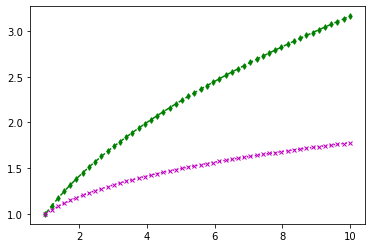

In [41]:
plt.plot(x, np.sqrt(x), '--dg', 
         x, np.power(x, 1/4), ':xm',
        markersize = 4)

## Практика занятия №2

#### Скачивание тестовых данных из **Google Drive**

In [5]:
tesla_url = 'https://drive.google.com/file/d/18dXi_M4OKVQhY1VjgCdqS1_Jx6hr8GBb/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + tesla_url.split('/')[-2]
tesla = pd.read_csv(path, index_col='Date', parse_dates=True)

In [6]:
tesla.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4035900,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002


In [7]:
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000
mean,130.990183,126.264738,128.700585,128.659506,4.236786e+06,128.659506
std,94.737840,91.842670,93.345356,93.315558,4.337805e+06,93.315558
min,16.629999,14.980000,16.139999,15.800000,1.185000e+05,15.800000
25%,30.247500,28.902500,29.742500,29.539999,1.160100e+06,29.539999
50%,150.354996,142.715004,147.834999,147.425003,3.100800e+06,147.425003
75%,220.825001,213.607506,217.367504,217.662495,5.620325e+06,217.662495
max,291.420013,280.399994,287.670013,286.040009,3.716390e+07,286.040009


In [8]:
first_profit_report_date = pd.Timestamp(day=8, month=5, year=2013)
# buy_price = tesla[first_profit_report_date:]['High'].median()  #223
buy_price = tesla.sort_values('Date').tail(1)['Close'].values[0]

#### функция для определение ранга значения в входном датафрейме, по заданному полю и параметру наибольшего или наименьшего порядка
функция сама определяет в рамках какого периода ей расчитывать ранги: если интервал индекса в рамках одного года, то ранг расчитывается по месяцам, в противном случае по годам

In [9]:
def get_rank(df: pd.DataFrame, field: str, largest: bool = True) -> pd.DataFrame:
    
    method, asc = ('first', False) if largest else ('min', True)
    
    if df.index[:].year.unique().size > 1:
        return (df.assign(data = df.index[:].strftime('%Y').astype(int))
               .assign(rnk = lambda x: x.groupby('data')[field]
                      .rank(method=method, ascending = asc))
               .query('rnk < 2'))
    else:
        return (df.assign(data = df.index[:].strftime('%m').astype(int))
               .assign(rnk = lambda x: x.groupby('data')[field]
                      .rank(method=method, ascending = asc))
               .query('rnk < 2'))


In [10]:
get_rank(tesla.iloc[tesla.index.year == 2014], field='High', largest=True)

,High,Low,Open,Close,Volume,Adj Close,data,rnk
Date,,,,,,,,
2014-01-31,186.000000,178.509995,178.850006,181.410004,6508800,181.410004,1,1.0
2014-02-26,265.000000,247.500000,258.579987,253.000000,24604600,253.000000,2,1.0
2014-03-04,260.000000,252.830002,258.480011,254.839996,8745600,254.839996,3,1.0
2014-04-03,235.729996,222.000000,230.300003,225.399994,10923700,225.399994,4,1.0
2014-05-06,218.660004,206.850006,216.600006,207.279999,5636700,207.279999,5,1.0
2014-06-30,244.490005,239.000000,239.550003,240.059998,4828600,240.059998,6,1.0
2014-07-01,243.440002,238.699997,242.460007,239.720001,4336100,239.720001,7,1.0
2014-08-29,272.000000,267.510010,268.700012,269.700012,6447100,269.700012,8,1.0
2014-09-04,291.420013,280.399994,284.010010,286.040009,8341700,286.040009,9,1.0


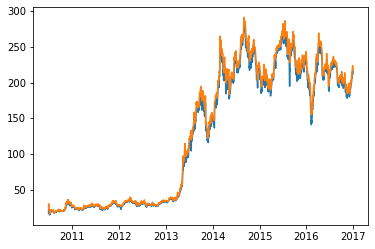

In [11]:
plt.plot(tesla.index, tesla['Low'], tesla['High'])
plt.savefig('Tesla stock prices (low).png', quality=95, dpi=300)

### Функция для построения графика

In [86]:
def myplot(df: pd.DataFrame, vline_value: pd.Timestamp, hline_value):
    plt.figure(figsize=(25,10))
    hi_clr, low_clr = 'g', 'r'
#     y_min = np.around(df[['High', 'Low']].min().min(), -1)
#     y_max = np.around(df[['High', 'Low']].max().max(), -2)
    y_min = np.around(df[['High','Low']].min().min(), -1).astype(int)
    y_max = np.around(df[['High','Low']].max().max(), -2).astype(int)
#     y_ticks = np.around(range(y_min, y_max+1,(y_max - y_min) // 10), -1)
    y_ticks = np.linspace(y_min, y_max, 10).round()
    
    high_line, = plt.plot(df.index, df['High'], color=hi_clr, label='High')
    low_line, = plt.plot(df.index, df['Low'], color=low_clr, label='Low')
    plt.fill_between(df.index, df['Low']-5, df['High']+5, edgecolors='orange', facecolor='yellow', alpha = 0.3)
    # plt.plot(tesla.index, tesla['Adj Close'], ':y', label='Adj', linewidth=0.75, )
    plt.setp((high_line, low_line), linewidth=0.5, alpha=0.5)
    
    hi_rnk = get_rank(df, field="High", largest=True)
    lw_rnk = get_rank(df, field="Low", largest=False)

    plt.scatter(hi_rnk.index, hi_rnk['High'], edgecolors=hi_clr, marker='o', linewidth=0.75, facecolor='none', label='High in period')
    plt.scatter(lw_rnk.index, lw_rnk['Low'], edgecolors=low_clr, marker='o', linewidth=0.75, facecolor='none', label='Low in period')    

    # вспомогательные линии
    if df.index.isin([vline_value]).any():
        plt.axvline(x=vline_value, ls='--', color='y', label=f'{vline_value:%D}')
    
    if y_min <= hline_value <= y_max:
        plt.axhline(y=hline_value, ls='--', label=f'Last price {hline_value:.2f}$')
        
    
#     if df.index[:].year.unique().size > 1:
    date = df.index[0]
    dates = []
    years = []
    while (date < df.index[-1]):
        date = date + MonthEnd(1)
        dates.append(date)

    while date > df.index[0]:
        date = date - YearEnd(1)
        years.append(date)

    for year in years[:-1]:
        plt.axvline(x=year, ls='-', color='black', linewidth=0.75)

    # вспомогательная сетка
    plt.xticks(dates, labels=[f'{d:%d.%m.%Y}' for d in dates], rotation='vertical', alpha=0.5)
    plt.yticks(y_ticks, labels=y_ticks, alpha=0.5)

    plt.title('Tesla stock price', loc='center', fontdict={'fontsize': 21, 'color' : 'red'})
    plt.xlabel('Dates')
    plt.ylabel('Stock prices')
    # plt.legend((high_line, low_line), ('High price line', 'Low price line'), loc='lower right', title='Legend')
    plt.legend(loc='lower right', title='Legend')
    plt.grid(alpha=0.5)
    # plt.show()
    plt.savefig('Tesla stock prices.png', quality=95, dpi=300)

In [71]:
first_profit_report_date + pd.DateOffset(2)

Timestamp('2013-05-10 00:00:00')

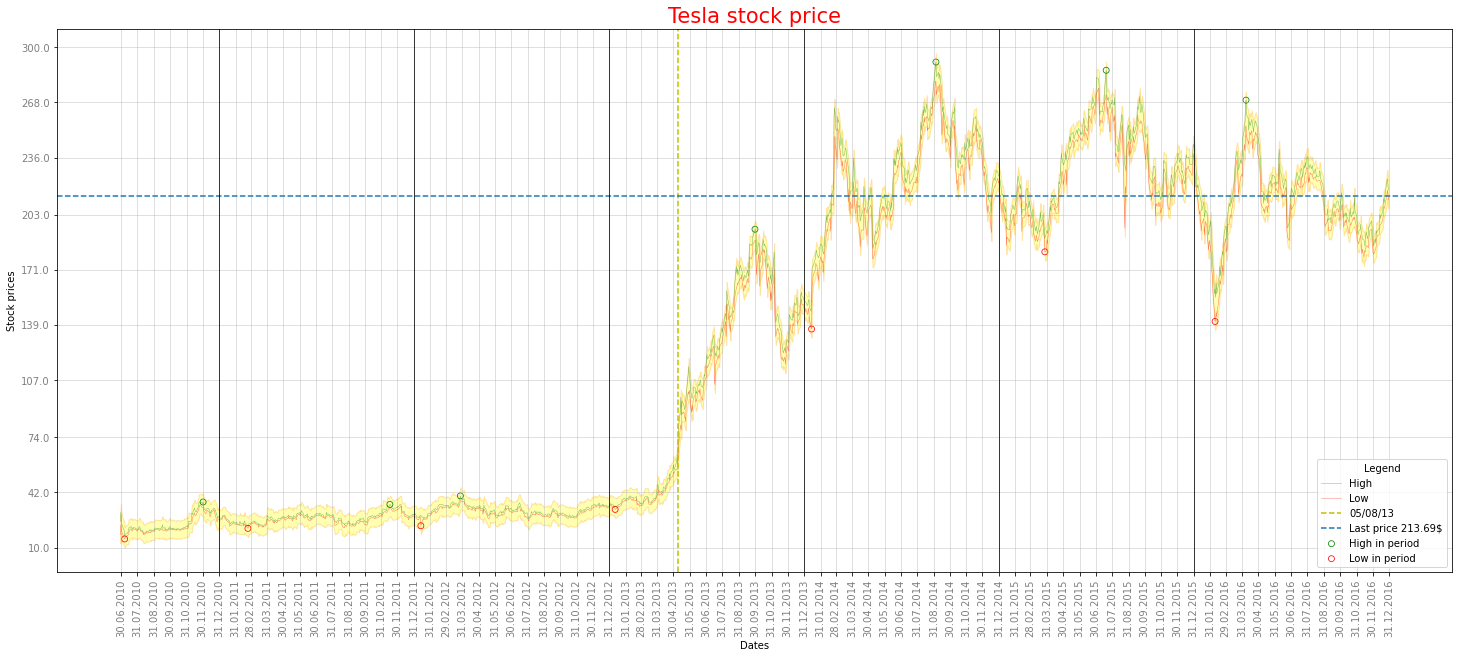

In [89]:
myplot(tesla, first_profit_report_date, buy_price)

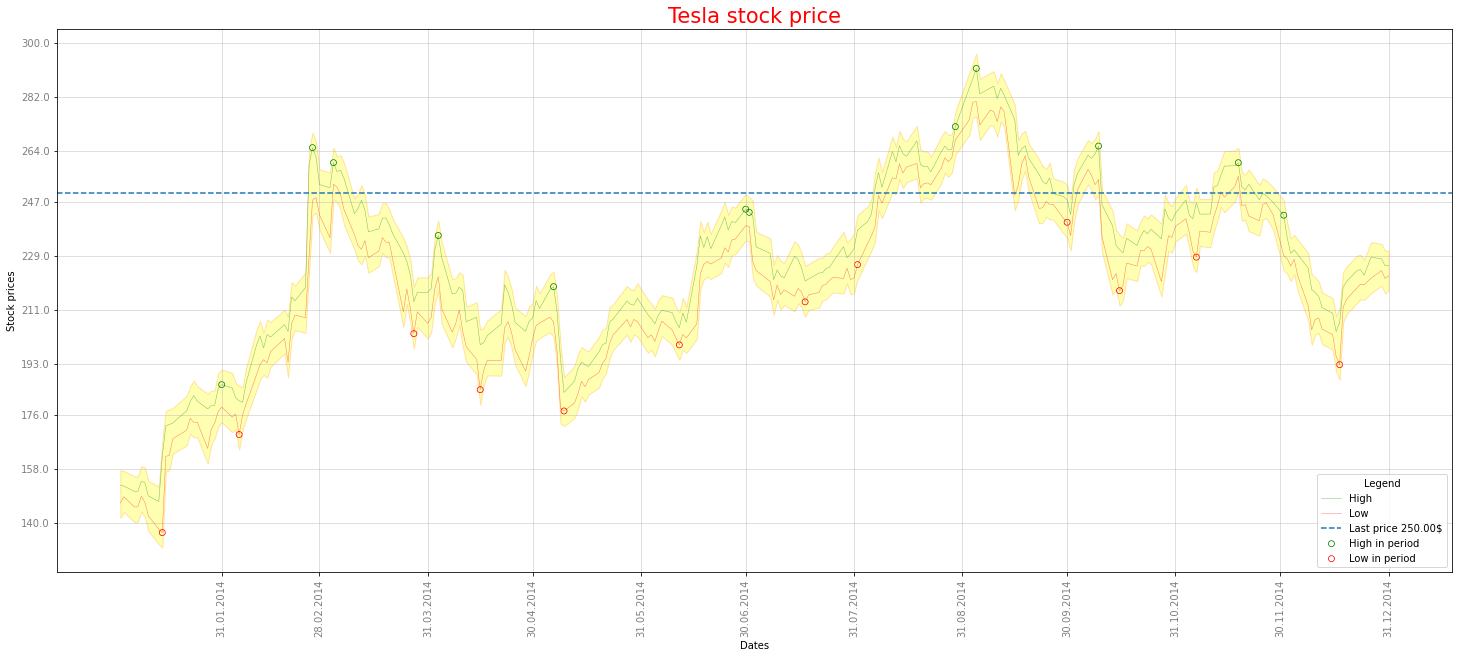

In [87]:
myplot(tesla.iloc[(tesla.index.year == 2014)], first_profit_report_date, 250)

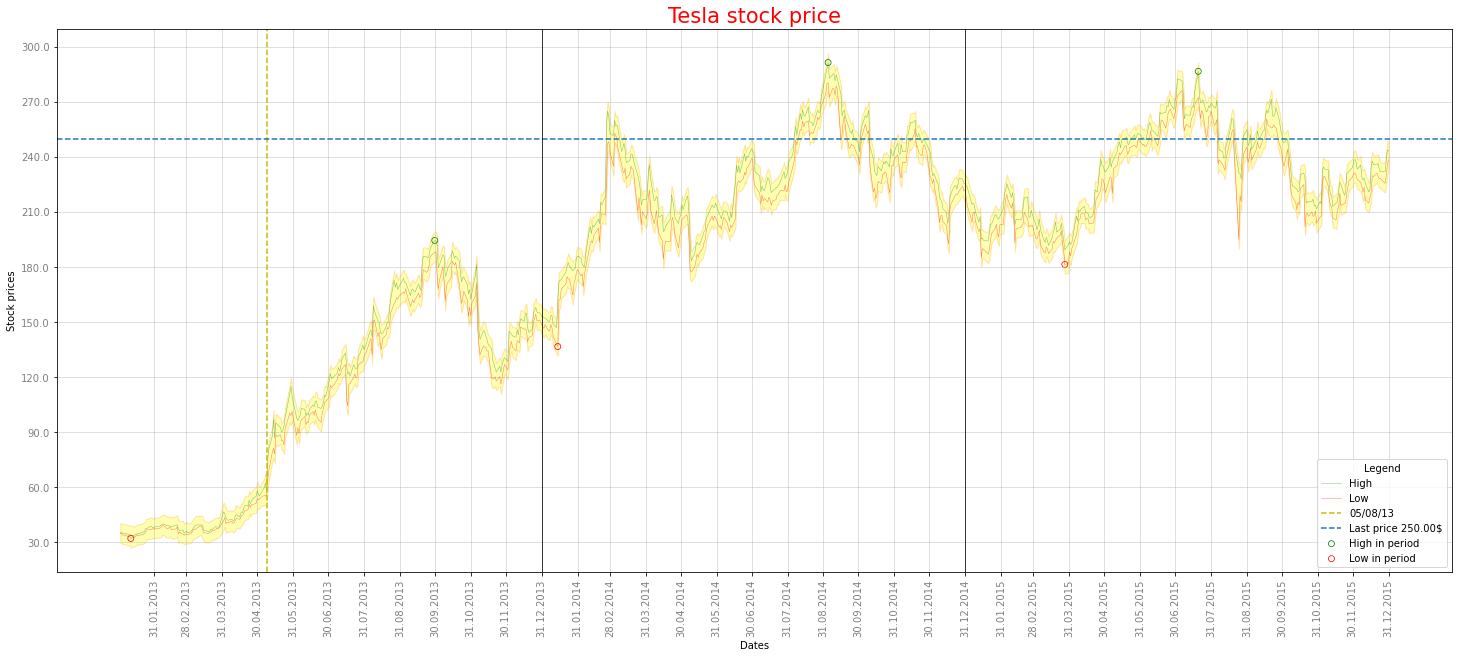

In [88]:
myplot(tesla.iloc[(tesla.index.year >= 2013) & (tesla.index.year <= 2015)], first_profit_report_date, 250)

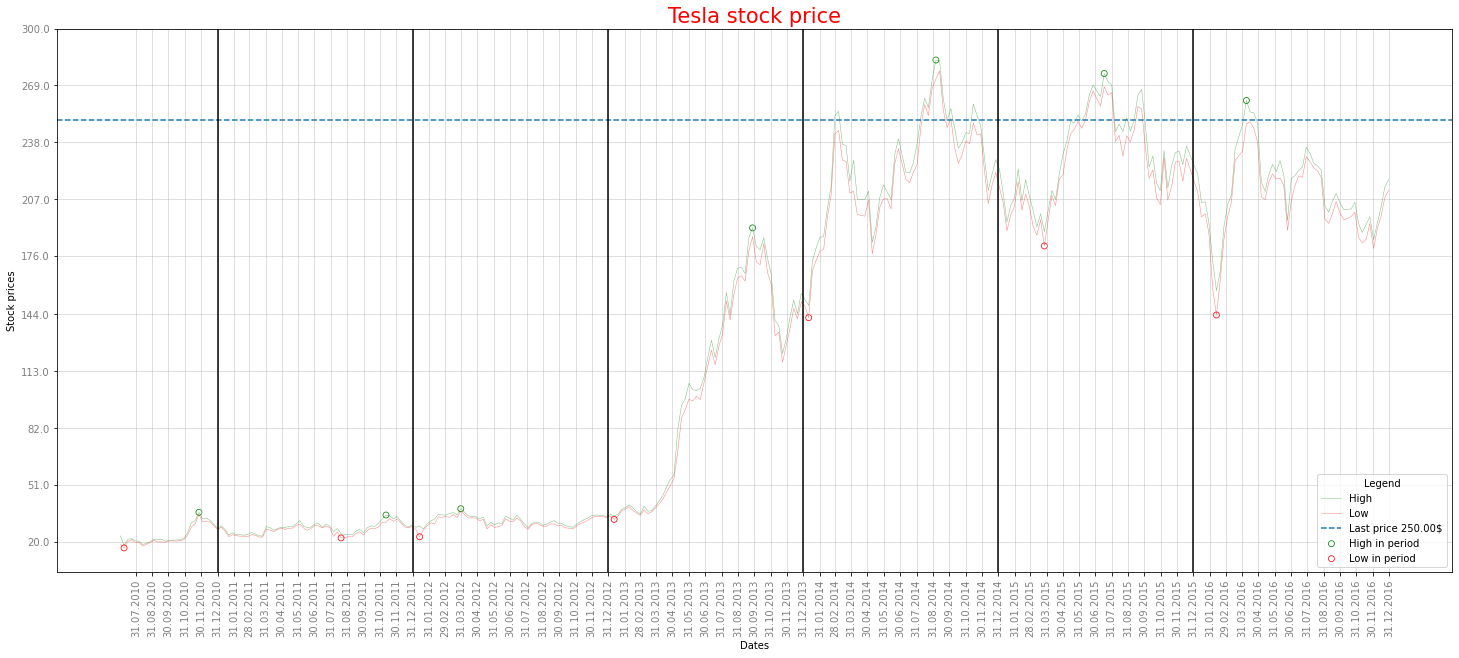

In [37]:
myplot(tesla.iloc[(tesla.index.weekday==4 ) ], first_profit_report_date, 250)